In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import os

In [2]:
# Step 1: Upload and Extract Dataset
from google.colab import files
import zipfile

# Upload the dataset ZIP file
uploaded = files.upload()

# Extract the uploaded ZIP file
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('/content/')

# Verify the extraction
os.listdir('/content/')

Saving Dataset.zip to Dataset.zip


['.config', 'Dataset.zip', 'Dataset', 'sample_data']

In [6]:
os.listdir('/content/Dataset/')

['Testing', 'Training']

In [15]:
# Step 2: Data Preprocessing
train_dir = '/content/Dataset/Training'
test_dir = '/content/Dataset/Testing'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Resize images to 128x128
target_size = (128, 128)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)

SyntaxError: invalid syntax (<ipython-input-15-e4f4d868afe0>, line 33)

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import os

In [17]:
# Step 3: Build the Enhanced CNN Model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fourth Convolutional Block
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output Layer
num_classes = 8  # Adjust based on your dataset
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_cnn_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Define a custom callback to print results after each epoch
class PrintEpochResults(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{30} - loss: {logs['loss']:.4f} - accuracy: {logs['accuracy']:.4f} - val_loss: {logs['val_loss']:.4f} - val_accuracy: {logs['val_accuracy']:.4f} - lr: {model.optimizer.learning_rate.numpy():.4f}")

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr, PrintEpochResults()]
)

Epoch 1/30
822/822 [==============================] - 161s 188ms/step - loss: 2.2219 - accuracy: 0.2032 - val_loss: 1.8166 - val_accuracy: 0.2729 - lr: 0.0010
Epoch 2/30
822/822 [==============================] - 153s 187ms/step - loss: 1.8501 - accuracy: 0.2648 - val_loss: 1.8653 - val_accuracy: 0.2707 - lr: 0.0010
Epoch 3/30
822/822 [==============================] - 152s 185ms/step - loss: 1.8100 - accuracy: 0.2811 - val_loss: 1.8292 - val_accuracy: 0.2656 - lr: 0.0010
Epoch 4/30
822/822 [==============================] - 154s 188ms/step - loss: 1.7656 - accuracy: 0.3028 - val_loss: 1.7145 - val_accuracy: 0.3222 - lr: 0.0010
Epoch 5/30
822/822 [==============================] - 153s 186ms/step - loss: 1.7348 - accuracy: 0.3153 - val_loss: 1.6508 - val_accuracy: 0.3450 - lr: 0.0010
Epoch 6/30
822/822 [==============================] - 153s 186ms/step - loss: 1.7084 - accuracy: 0.3275 - val_loss: 1.6415 - val_accuracy: 0.3566 - lr: 0.0010
Epoch 7/30
822/822 [==========================

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

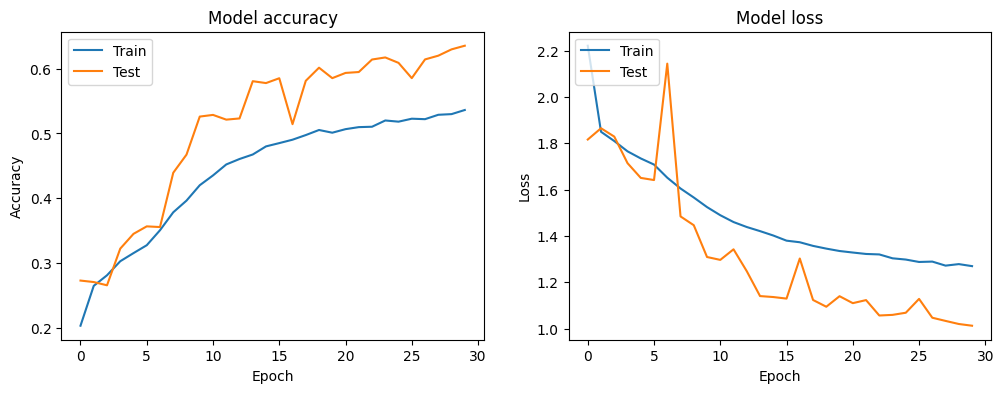

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

Found 6573 images belonging to 8 classes.
206/206 [==============================] - 8s 39ms/step
              precision    recall  f1-score   support

       anger       0.55      0.54      0.55       945
    contempt       0.00      0.00      0.00        26
     disgust       0.59      0.47      0.52       159
        fear       0.45      0.12      0.19       691
   happiness       0.81      0.88      0.84      1810
  neutrality       0.61      0.49      0.55      1015
     sadness       0.51      0.68      0.58      1081
    surprise       0.62      0.81      0.70       846

    accuracy                           0.64      6573
   macro avg       0.52      0.50      0.49      6573
weighted avg       0.62      0.64      0.61      6573



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


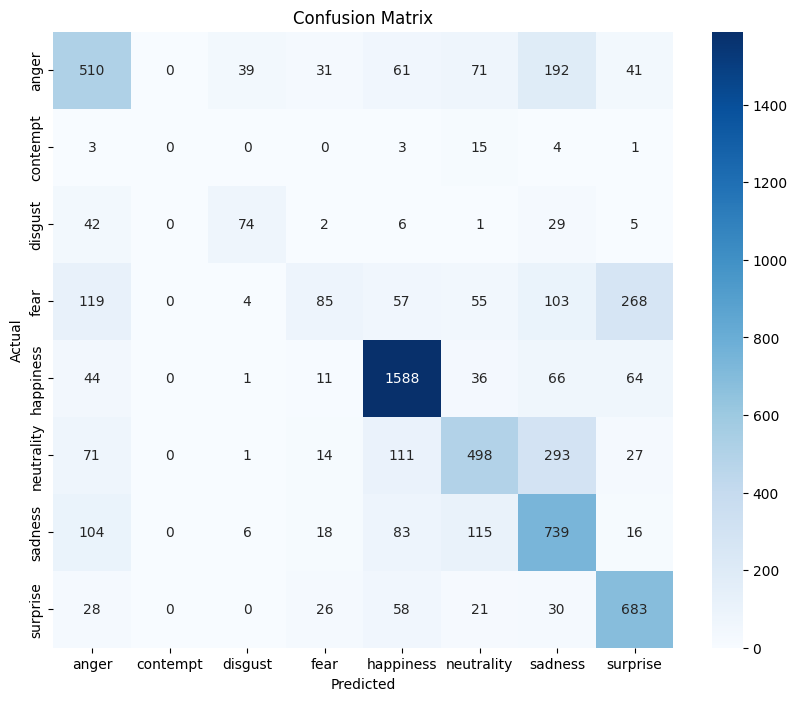

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

# Load the trained CNN model
model = load_model('best_cnn_model.h5')

# Define data directories
test_dir = '/content/Dataset/Testing'  # Ensure the path is correct

# Create data generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Resize images to 128x128
target_size = (128, 128)

# Generate batches of data from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep data in order to evaluate metrics
)

# Evaluate model on test data to get predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)

# Optional: Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Found 6573 images belonging to 8 classes.
206/206 [==============================] - 7s 35ms/step
              precision    recall  f1-score   support

       anger       0.55      0.54      0.55       945
    contempt       0.00      0.00      0.00        26
     disgust       0.59      0.47      0.52       159
        fear       0.45      0.12      0.19       691
   happiness       0.81      0.88      0.84      1810
  neutrality       0.61      0.49      0.55      1015
     sadness       0.51      0.68      0.58      1081
    surprise       0.62      0.81      0.70       846

    accuracy                           0.64      6573
   macro avg       0.52      0.50      0.49      6573
weighted avg       0.62      0.64      0.61      6573



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


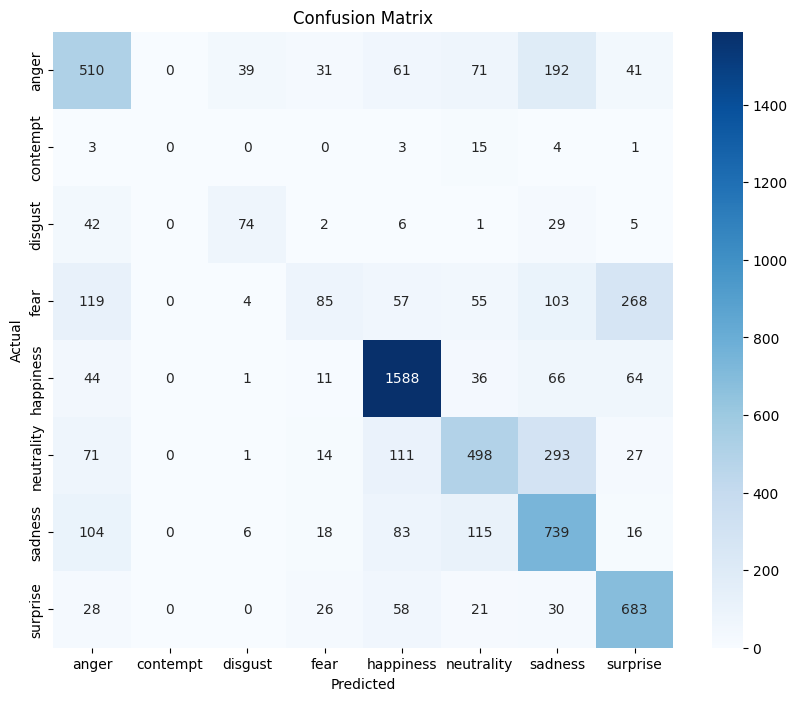

In [23]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

# Load the trained traditional CNN model
model = load_model('best_cnn_model.h5')

# Define data directories
test_dir = '/content/Dataset/Testing'  # Ensure the path is correct

# Create data generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Resize images to 128x128
target_size = (128, 128)

# Generate batches of data from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep data in order to evaluate metrics
)

# Step 1: Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Step 2: Retrieve true labels
y_true = test_generator.classes  # This gives you the true labels

# Step 3: Get class names (emotions)
emotions = list(test_generator.class_indices.keys())

# Step 4: Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=emotions)

# Print the classification report
print(report)

# Optional: Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=emotions, yticklabels=emotions)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Saving depositphotos_223033032-stock-photo-angry-screaming-young-girl-portrait.jpg to depositphotos_223033032-stock-photo-angry-screaming-young-girl-portrait.jpg
1/1 [==============================] - 0s 459ms/step


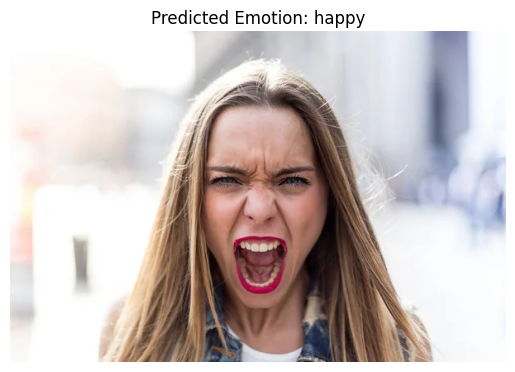

Predicted Emotion: happy


In [24]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained CNN model
model = load_model('best_cnn_model.h5')  # Adjust the model filename as per your saved model

# Define emotions for mapping predicted indices
emotions = ['angry', 'disgust', 'fear', 'happy', 'sadness', 'surprise', 'neutral', 'contempt']

# Function to preprocess image
def preprocess_image(img):
    img = cv2.resize(img, (128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Scale pixel values to [0, 1]
    return img_array

# Function to predict emotion
def predict_emotion(img):
    img = preprocess_image(img)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    return emotions[predicted_class]

# Upload an image file
uploaded = files.upload()

# Process uploaded image and make prediction
for filename in uploaded.keys():
    img_path = '/content/' + filename
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB for display
    predicted_emotion = predict_emotion(img)

    # Display image and predicted emotion
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f'Predicted Emotion: {predicted_emotion}')
    plt.show()

    print(f'Predicted Emotion: {predicted_emotion}')
